In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



In [2]:
training_data_df = pd.read_csv('training_data.csv', index_col = [0])
training_data_df.head()

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income
Instance,,,,,,,,,,,
1,1997.0,0,41.0,Belarus,1239930,steel workers,Bachelor,0,Blond,193,61031.94416
2,1996.0,other,41.0,Singapore,1603504,safe event coordinator,Master,0,Black,186,91001.32764
3,2018.0,other,28.0,Norway,1298017,receivables/payables analyst,PhD,1,Brown,170,157982.17670
4,2006.0,other,33.0,Cuba,751903,fleet assistant,No,1,Black,171,45993.75793
5,2010.0,female,46.0,United Arab Emirates,95389,lead trainer,0,0,Blond,188,38022.16217


In [3]:
predict_data_df = pd.read_csv('predict_data.csv', index_col = [0])
predict_data_df.head()

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income
Instance,,,,,,,,,,,
111994,1992.0,other,21.0,Honduras,391652,senior project analyst,Master,1,Brown,153,NaN
111995,1986.0,other,34.0,Kyrgyzstan,33653,greeter,Bachelor,0,Black,163,NaN
111996,1994.0,unknown,53.0,Portugal,34765,liaison,Bachelor,1,Blond,153,NaN
111997,1984.0,0,29.0,Uruguay,1494132,occupational therapist,No,0,Black,154,NaN
111998,2007.0,other,17.0,Serbia,120661,portfolio manager,No,0,Red,191,NaN


In [4]:
# concat the table
total_data_df = pd.concat([training_data_df, predict_data_df])
total_data_df.head()

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income
Instance,,,,,,,,,,,
1,1997.0,0,41.0,Belarus,1239930,steel workers,Bachelor,0,Blond,193,61031.94416
2,1996.0,other,41.0,Singapore,1603504,safe event coordinator,Master,0,Black,186,91001.32764
3,2018.0,other,28.0,Norway,1298017,receivables/payables analyst,PhD,1,Brown,170,157982.17670
4,2006.0,other,33.0,Cuba,751903,fleet assistant,No,1,Black,171,45993.75793
5,2010.0,female,46.0,United Arab Emirates,95389,lead trainer,0,0,Blond,188,38022.16217


In [5]:
# clean the data
# drop 'Hair Color' 'Body Height [cm]'
# total_data_df.drop('Wears Glasses', axis = 1, inplace = True)
total_data_df.drop('Hair Color', axis = 1, inplace = True)
total_data_df.drop('Body Height [cm]', axis = 1, inplace = True)

# training predict do the same
training_data_df.drop('Hair Color', axis = 1, inplace = True)
training_data_df.drop('Body Height [cm]', axis = 1, inplace = True)
predict_data_df.drop('Hair Color', axis = 1, inplace = True)
predict_data_df.drop('Body Height [cm]', axis = 1, inplace = True)

total_data_df.head()

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Income
Instance,,,,,,,,,
1,1997.0,0,41.0,Belarus,1239930,steel workers,Bachelor,0,61031.94416
2,1996.0,other,41.0,Singapore,1603504,safe event coordinator,Master,0,91001.32764
3,2018.0,other,28.0,Norway,1298017,receivables/payables analyst,PhD,1,157982.17670
4,2006.0,other,33.0,Cuba,751903,fleet assistant,No,1,45993.75793
5,2010.0,female,46.0,United Arab Emirates,95389,lead trainer,0,0,38022.16217


In [6]:
# see total amount
total_data_df.count

<bound method DataFrame.count of           Year of Record   Gender   Age                   Country  \
Instance                                                            
1                 1997.0        0  41.0                   Belarus   
2                 1996.0    other  41.0                 Singapore   
3                 2018.0    other  28.0                    Norway   
4                 2006.0    other  33.0                      Cuba   
5                 2010.0   female  46.0      United Arab Emirates   
6                 1991.0     male  60.0                   Liberia   
7                 1982.0      NaN  71.0        State of Palestine   
8                 2008.0     male  36.0                    Israel   
9                 2015.0     male  43.0               South Sudan   
10                2019.0   female  16.0                      Cuba   
11                1981.0     male  51.0                Kyrgyzstan   
12                1989.0    other  15.0                      Togo   
1

In [7]:
# Year of Record clean
# 1980-2019 get the medium => 2000
total_data_df['Year of Record'].value_counts().sort_index()

1980.0    4692
1981.0    4782
1982.0    4595
1983.0    4654
1984.0    4702
1985.0    4659
1986.0    4579
1987.0    4661
1988.0    4578
1989.0    4758
1990.0    4550
1991.0    4529
1992.0    4617
1993.0    4596
1994.0    4587
1995.0    4609
1996.0    4586
1997.0    4609
1998.0    4593
1999.0    4560
2000.0    4619
2001.0    4546
2002.0    4638
2003.0    4640
2004.0    4615
2005.0    4446
2006.0    4632
2007.0    4512
2008.0    4513
2009.0    4620
2010.0    4584
2011.0    4633
2012.0    4622
2013.0    4628
2014.0    4641
2015.0    4669
2016.0    4670
2017.0    4552
2018.0    4549
2019.0    4662
Name: Year of Record, dtype: int64

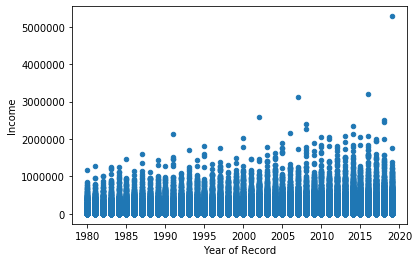

In [8]:
# Visualize year
training_data_df.plot.scatter(x='Year of Record', y = 'Income')
# TODO outliner!!!

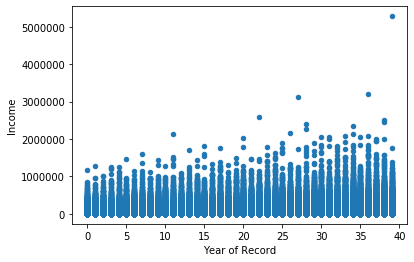

In [9]:
training_data_df['Year of Record'].fillna(2000, inplace = True)
training_data_df['Year of Record'] = training_data_df['Year of Record'].map(lambda year: year - 1980)

total_data_df['Year of Record'].fillna(2000, inplace = True)
total_data_df['Year of Record'] = total_data_df['Year of Record'].map(lambda year: year - 1980)
predict_data_df['Year of Record'].fillna(2000, inplace = True)
predict_data_df['Year of Record'] = predict_data_df['Year of Record'].map(lambda year: year - 1980)

training_data_df.plot.scatter(x='Year of Record', y = 'Income')


In [10]:
# Gender clean
total_data_df['Gender'].value_counts().sort_index()

0           1179
female     44913
male       70968
other      44674
unknown    11195
Name: Gender, dtype: int64

In [11]:
# show Gender == '0'
total_data_df[total_data_df['Gender'] == '0']

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Income
Instance,,,,,,,,,
1,17.0,0,41.0,Belarus,1239930,steel workers,Bachelor,0,61031.94416
100,10.0,0,66.0,Israel,698465,rail-track laying and maintenance equipment op...,No,1,35868.50329
331,0.0,0,54.0,Sweden,2213069,social scientist,Bachelor,0,44435.56381
460,36.0,0,25.0,Honduras,1737119,open market order coordinator,No,1,67106.97361
548,27.0,0,42.0,Cuba,26645,optician,No,0,94930.11410
755,6.0,0,78.0,Israel,1440115,open market order coordinator,No,1,35465.51693
1082,24.0,0,53.0,Guatemala,39635,police officer,PhD,0,460630.53090
1137,39.0,0,58.0,Tajikistan,17957,parts salesperson,Master,1,41284.55844
1259,9.0,0,36.0,Czechia,1136181,social worker,No,0,86022.86684


In [12]:
# gender 0 => unknown
# #N/A => unknown
training_data_df['Gender'].fillna('unknown', inplace = True)
training_data_df['Gender'].replace('0', 'unknown', inplace = True)

total_data_df['Gender'].fillna('unknown', inplace = True)
total_data_df['Gender'].replace('0', 'unknown', inplace = True)

predict_data_df['Gender'].fillna('unknown', inplace = True)
predict_data_df['Gender'].replace('0', 'unknown', inplace = True)

training_data_df['Gender'].value_counts().sort_index()

female     27170
male       42758
other      27060
unknown    15005
Name: Gender, dtype: int64

In [13]:
# get dummies for Gender
gender_dummies = pd.get_dummies(total_data_df['Gender'], prefix = 'Gender')
total_data_df.drop('Gender', axis = 1, inplace = True)
total_data_df = total_data_df.join(gender_dummies)

gender_dummies = pd.get_dummies(predict_data_df['Gender'], prefix = 'Gender')
predict_data_df.drop('Gender', axis = 1, inplace = True)
predict_data_df = predict_data_df.join(gender_dummies)

gender_dummies = pd.get_dummies(training_data_df['Gender'], prefix = 'Gender')
training_data_df.drop('Gender', axis = 1, inplace = True)
training_data_df = training_data_df.join(gender_dummies)


In [14]:
# Country clean
total_data_df['Country'].value_counts().sort_index()

Afghanistan                   27
Albania                      653
Algeria                       11
Angola                        92
Argentina                      6
Armenia                      846
Australia                    289
Austria                     3703
Azerbaijan                  3140
Bahamas                        5
Bahrain                      204
Barbados                       3
Belarus                     3517
Belgium                     1967
Belize                         6
Benin                       1778
Bhutan                        31
Bolivia                     2200
Bosnia and Herzegovina       932
Botswana                     391
Brunei                        11
Bulgaria                    3597
Burkina Faso                 440
Burundi                     2152
Cabo Verde                    12
Cambodia                    1116
Cameroon                     212
Canada                        39
Central African Republic    1764
Chad                        1302
          

In [15]:
total_data_df['Country'].fillna('unknown', inplace = True)
training_data_df['Country'].fillna('unknown', inplace = True)
predict_data_df['Country'].fillna('unknown', inplace = True)

dummies = pd.get_dummies(total_data_df['Country'], prefix = 'Country')
total_data_df.drop('Country', axis = 1, inplace = True)
total_data_df = total_data_df.join(dummies)

dummies = pd.get_dummies(predict_data_df['Country'], prefix = 'Country')
predict_data_df.drop('Country', axis = 1, inplace = True)
predict_data_df = predict_data_df.join(dummies)

dummies = pd.get_dummies(training_data_df['Country'], prefix = 'Country')
training_data_df.drop('Country', axis = 1, inplace = True)
training_data_df = training_data_df.join(dummies)

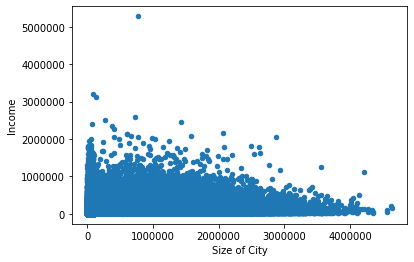

In [16]:
# Size of City clean
training_data_df[training_data_df['Size of City'] < 8e6].plot.scatter(x='Size of City', y = 'Income')

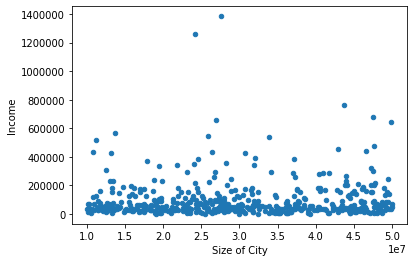

In [17]:
training_data_df[training_data_df['Size of City'] > 8e6].plot.scatter(x='Size of City', y = 'Income')

In [18]:
training_data_df['SoC_8e6_1'] = training_data_df['Size of City'].map(lambda soc: soc if soc < 8e6 else 0)
total_data_df['SoC_8e6_1'] = total_data_df['Size of City'].map(lambda soc: soc if soc < 8e6 else 0)
predict_data_df['SoC_8e6_1'] = predict_data_df['Size of City'].map(lambda soc: soc if soc < 8e6 else 0)

In [19]:
training_data_df['SoC_8e6_2'] = training_data_df['Size of City'].map(lambda soc: soc if soc > 8e6 else 0)
total_data_df['SoC_8e6_2'] = total_data_df['Size of City'].map(lambda soc: soc if soc > 8e6 else 0)
predict_data_df['SoC_8e6_2'] = predict_data_df['Size of City'].map(lambda soc: soc if soc > 8e6 else 0)


In [20]:
training_data_df.drop('Size of City', axis = 1, inplace = True)
total_data_df.drop('Size of City', axis = 1, inplace = True)
predict_data_df.drop('Size of City', axis = 1, inplace = True)

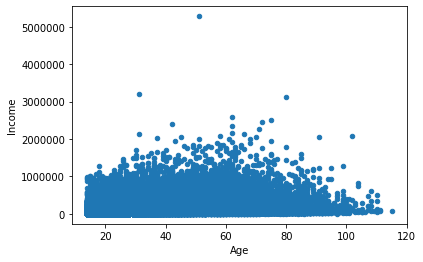

In [21]:
training_data_df.plot.scatter(x='Age', y = 'Income')

In [22]:
# Age clean
# training_data_df['Age'].median() # => 35 skipna = True
training_data_df['Age'].fillna(35, inplace=True)
total_data_df['Age'].fillna(35, inplace=True)
predict_data_df['Age'].fillna(35, inplace=True)

In [23]:
training_data_df['University Degree'].value_counts().sort_index()

0             697
Bachelor    43172
Master      26941
No          26992
PhD          6821
Name: University Degree, dtype: int64

In [24]:
training_data_df['University Degree'].fillna('unknown', inplace=True)
total_data_df['University Degree'].fillna('unknown', inplace=True)
predict_data_df['University Degree'].fillna('unknown', inplace=True)

In [26]:
training_data_df['University Degree'] = training_data_df['University Degree'].map(lambda x: 'unknown' if x == '0' else x)
total_data_df['University Degree'] = total_data_df['University Degree'].map(lambda x: 'unknown' if x == '0' else x)
predict_data_df['University Degree'] = predict_data_df['University Degree'].map(lambda x: 'unknown' if x == '0' else x)

In [27]:
training_data_df['University Degree'].value_counts().sort_index()

Bachelor    43172
Master      26941
No          26992
PhD          6821
unknown      8067
Name: University Degree, dtype: int64

In [28]:
dummies = pd.get_dummies(total_data_df['University Degree'], prefix = 'UD')
total_data_df.drop('University Degree', axis = 1, inplace = True)
total_data_df = total_data_df.join(dummies)

dummies = pd.get_dummies(predict_data_df['University Degree'], prefix = 'UD')
predict_data_df.drop('University Degree', axis = 1, inplace = True)
predict_data_df = predict_data_df.join(dummies)

dummies = pd.get_dummies(training_data_df['University Degree'], prefix = 'UD')
training_data_df.drop('University Degree', axis = 1, inplace = True)
training_data_df = training_data_df.join(dummies)

In [30]:
# discard profession

training_data_df.drop('Profession', axis = 1, inplace = True)
total_data_df.drop('Profession', axis = 1, inplace = True)
predict_data_df.drop('Profession', axis = 1, inplace = True)

In [35]:
# discard profession

training_data_df.drop('Wears Glasses', axis = 1, inplace = True)
total_data_df.drop('Wears Glasses', axis = 1, inplace = True)
predict_data_df.drop('Wears Glasses', axis = 1, inplace = True)

In [36]:
training_data_df

,Year of Record,Age,Income,Gender_female,Gender_male,Gender_other,Gender_unknown,Country_Afghanistan,Country_Albania,Country_Algeria,...,Country_Yemen,Country_Zambia,Country_Zimbabwe,SoC_8e6_1,SoC_8e6_2,UD_Bachelor,UD_Master,UD_No,UD_PhD,UD_unknown
Instance,,,,,,,,,,,,,,,,,,,,,
1,17.0,41.0,61031.944160,0,0,0,1,0,0,0,...,0,0,0,1239930,0,1,0,0,0,0
2,16.0,41.0,91001.327640,0,0,1,0,0,0,0,...,0,0,0,1603504,0,0,1,0,0,0
3,38.0,28.0,157982.176700,0,0,1,0,0,0,0,...,0,0,0,1298017,0,0,0,0,1,0
4,26.0,33.0,45993.757930,0,0,1,0,0,0,0,...,0,0,0,751903,0,0,0,1,0,0
5,30.0,46.0,38022.162170,1,0,0,0,0,0,0,...,0,0,0,95389,0,0,0,0,0,1
6,11.0,60.0,125809.990300,0,1,0,0,0,0,0,...,0,0,0,56080,0,1,0,0,0,0
7,2.0,71.0,150319.422600,0,0,0,1,0,0,0,...,0,0,0,1205185,0,1,0,0,0,0
8,28.0,36.0,11849.028760,0,1,0,0,0,0,0,...,0,0,0,31419,0,0,0,0,0,1
9,35.0,43.0,48058.206070,0,1,0,0,0,0,0,...,0,0,0,85333,0,0,0,1,0,0


In [49]:
 # training
linreg1 = LinearRegression()

total = total_data_df.drop('Income', axis = 1, inplace = False)
x = total[: 111993]
y = training_data_df['Income']

linreg1.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
linreg1.score(x, y)

0.7059325903802911

In [68]:
# prediction
x = total[111993: ]
y = linreg1.predict(x)

In [69]:
y

array([  4048.92887278,   8347.51963801,  72513.95306061, ...,
       119968.91993039, 240517.43708666, 184424.85177068])

In [70]:
income_series = pd.Series(y, name = 'Income')

In [71]:
instance_series = pd.Series(np.arange(111994, 111994 + 73229 + 1), name = 'Instance')

In [72]:
result = pd.concat([instance_series, income_series], axis = 1)

In [73]:
result.to_csv('result.csv', index = False)